In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [2]:
run_path = '../'
test_name = 'HarmonicOscillator1D_LowFreq'

test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_128',
 'CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_128',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_64',
 'CKAN_A_8',
 'FCN_128',
 'FCN_32',
 'FCN_8',
 'FCN_A_128',
 'FCN_A_32',
 'FCN_A_8',
 'LKAN_128',
 'LKAN_16',
 'LKAN_32',
 'LKAN_64',
 'LKAN_8',
 'LKAN_A_128',
 'LKAN_A_16',
 'LKAN_A_32',
 'LKAN_A_64',
 'LKAN_A_8']

In [4]:
analyser = RunAnalyser(runs, test_path)

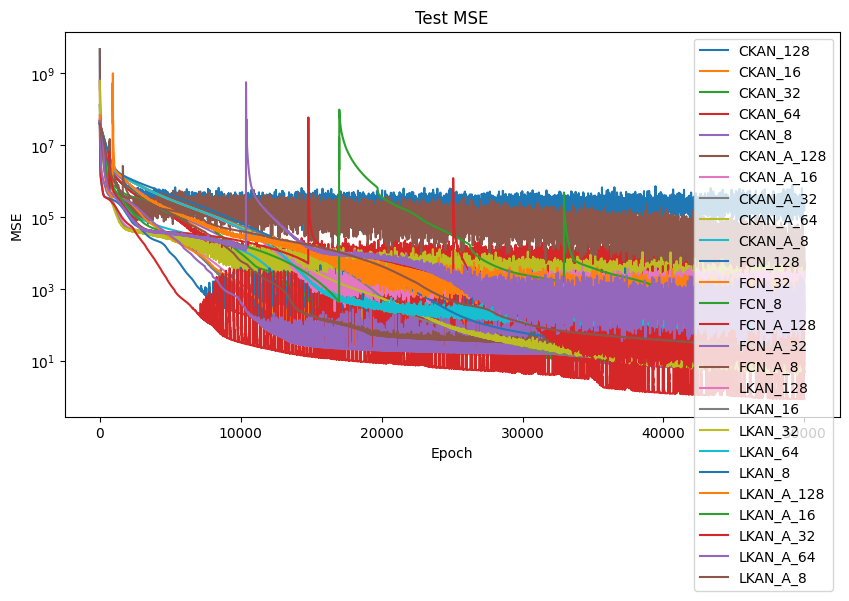

{'CKAN_128': 0.3972052292433884,
 'CKAN_16': 0.2143526255416032,
 'CKAN_32': 0.6339232611185222,
 'CKAN_64': 0.5246144672929661,
 'CKAN_8': 0.07102629370515591,
 'CKAN_A_128': 0.7076546385346351,
 'CKAN_A_16': 0.5412587053113844,
 'CKAN_A_32': 0.7003716294242233,
 'CKAN_A_64': 0.5131334053328452,
 'CKAN_A_8': 0.11123323754991658,
 'FCN_128': 2.5548723285688855,
 'FCN_32': 1.2319070528951757,
 'FCN_8': 0.3867542721907859,
 'FCN_A_128': 4.228790100796838,
 'FCN_A_32': 0.9378741901963823,
 'FCN_A_8': 0.16423193395331986,
 'LKAN_128': 0.38566327805163103,
 'LKAN_16': 0.05938905764814815,
 'LKAN_32': 0.352146227468182,
 'LKAN_64': 0.32483749013351015,
 'LKAN_8': 0.0363369097520195,
 'LKAN_A_128': 0.39878653148447685,
 'LKAN_A_16': 0.19565538059048793,
 'LKAN_A_32': 0.6611740827318331,
 'LKAN_A_64': 0.8628186477072491,
 'LKAN_A_8': 0.06818387653002814}

In [5]:
# Plot all models
analyser.plot_mses()
analyser.get_late_variances()

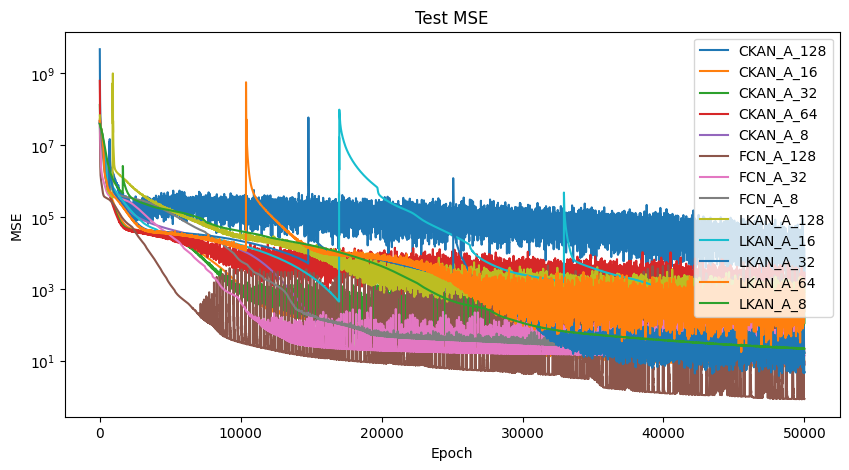

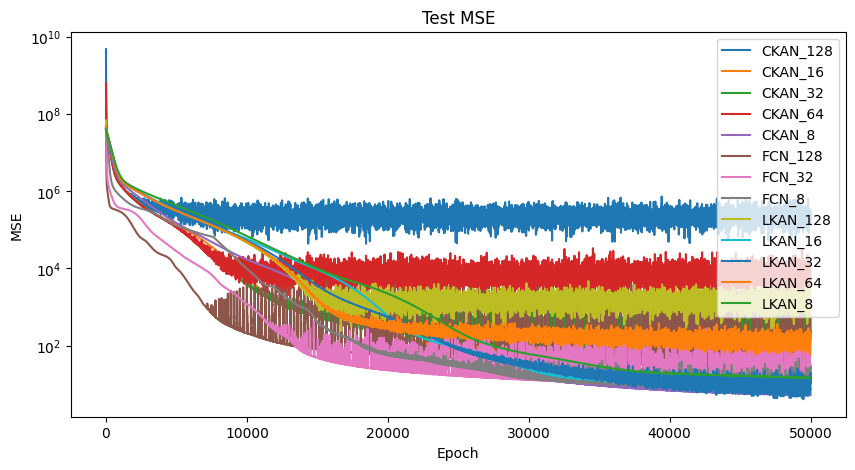

(None, None)

In [6]:
analyser.plot_mses(filter=adaptive_filter), analyser.plot_mses(filter=non_adaptive_filter)

# Non-adaptive analysis

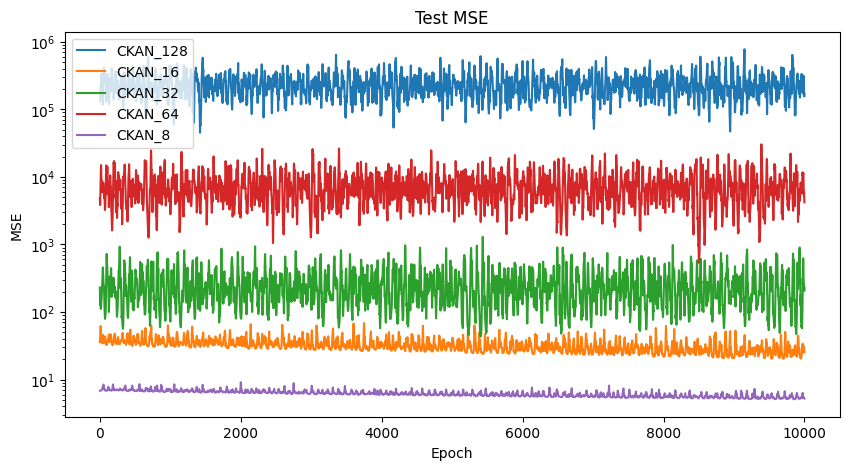

In [7]:
non_adaptive_ckans = lambda x: model_filter(x, 'CKAN') and non_adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=non_adaptive_ckans, start=40000)

CKAN_8 is best

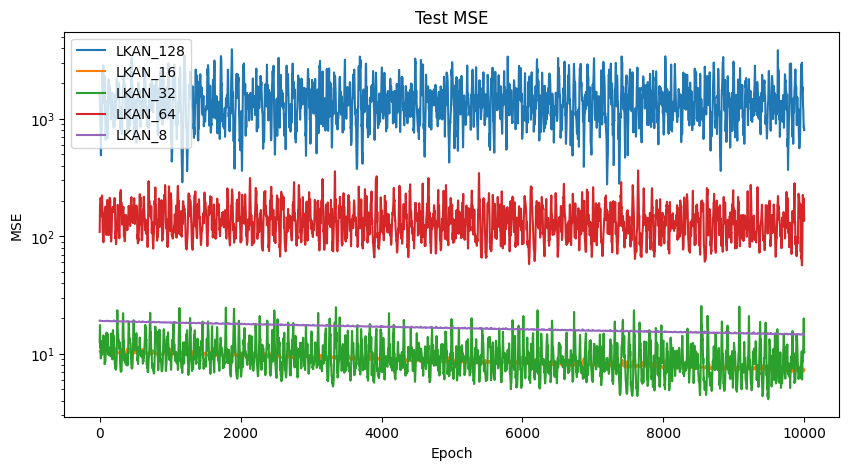

{'LKAN_128': 86.91760755054997,
 'LKAN_16': 0.03724863925258187,
 'LKAN_32': 0.40490223462730185,
 'LKAN_64': 6.340975364931513,
 'LKAN_8': 0.010636696470702978}

In [8]:
non_adaptive_lkans = lambda x: model_filter(x, 'LKAN') and non_adaptive_filter(x)
analyser.plot_mses(filter=non_adaptive_lkans, start=40000)
analyser.get_mean_absolute_change(filter=non_adaptive_lkans, start=40000)

16 and 32 are same but 16 is more stable. 8 is also good

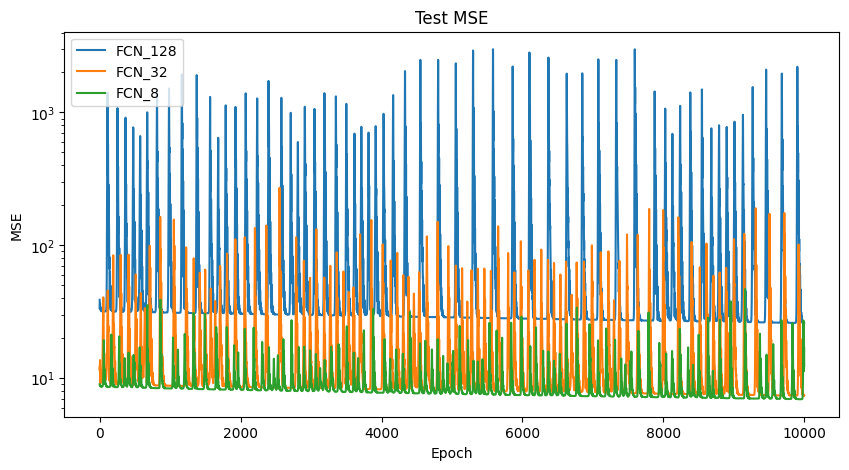

{'FCN_128': 24.012501334056747,
 'FCN_32': 1.9644646361799571,
 'FCN_8': 0.3374193805565249}

In [9]:
non_adaptive_fcns = lambda x: model_filter(x, 'FCN') and non_adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=non_adaptive_fcns, start=40000)
analyser.get_mean_absolute_change(filter=non_adaptive_fcns, start=40000)

FCN 8 and 32 are best but 32 is very unstable

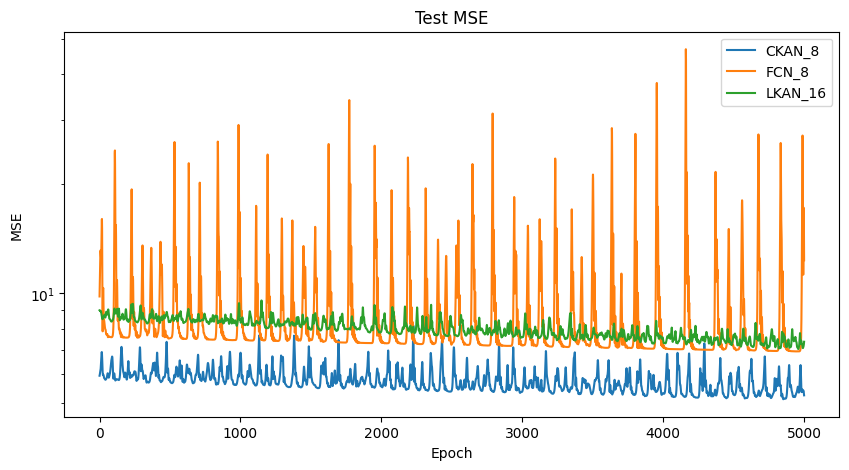

In [10]:
d = ['FCN_8', 'CKAN_8', 'LKAN_16']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=45000)

ckan slightly wins

# Adaptive analysis

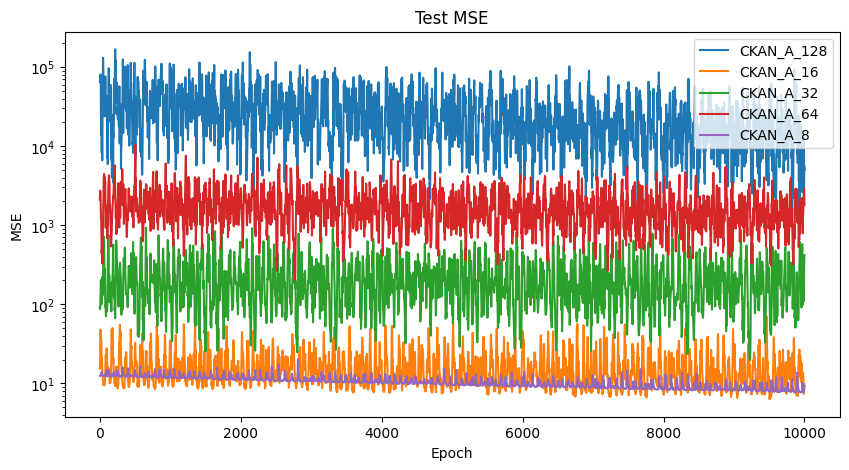

In [11]:
adaptive_ckans = lambda x: model_filter(x, 'CKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=adaptive_ckans, start=40000)

8 is best, 16 is good

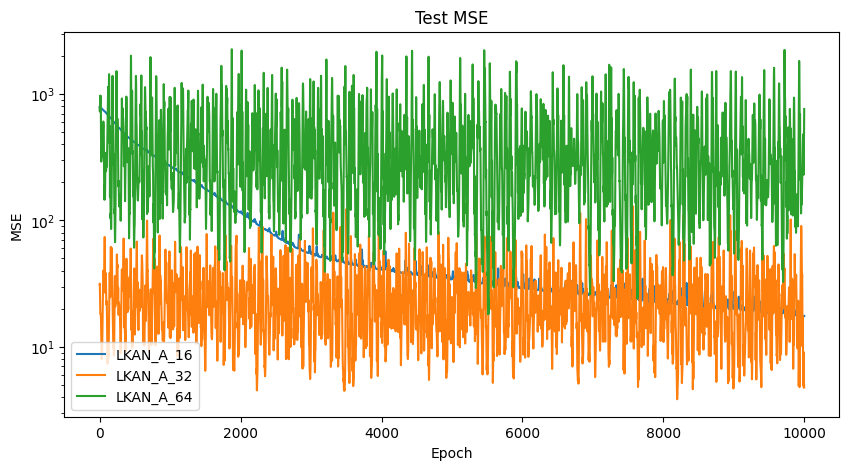

In [12]:
adaptive_lkans = lambda x: model_filter(x, 'LKAN') and adaptive_filter(x) and '_128' not in x and '_8' not in x #  and '_8' not in x
analyser.plot_mses(filter=adaptive_lkans, start=40000)

16 is best and most stable

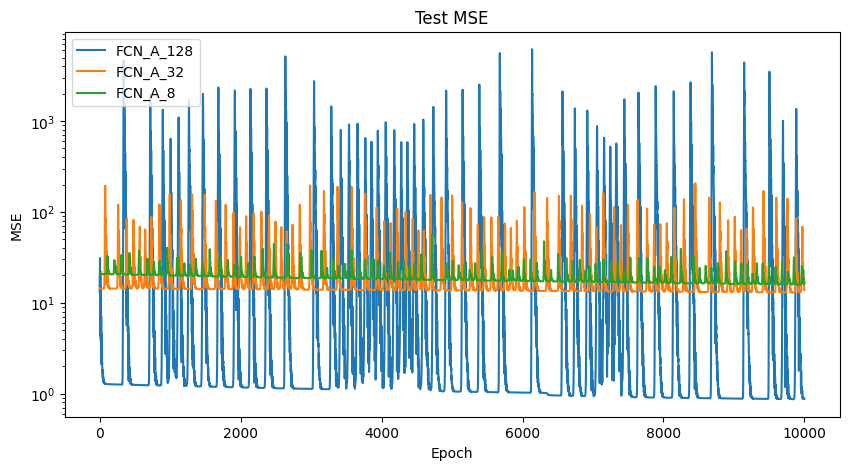

In [13]:
adaptive_fcns = lambda x: model_filter(x, 'FCN') and adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=adaptive_fcns, start=40000)

128 is best but very unstable, 8 is better bet

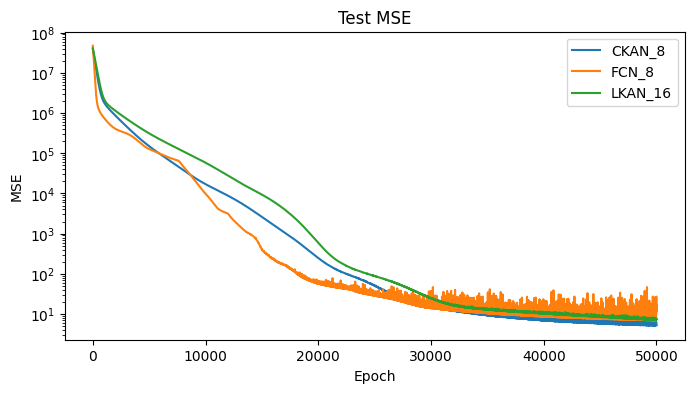

In [14]:
d = ['FCN_8', 'CKAN_8', 'LKAN_16']
f = lambda x: x in d
analyser.plot_mses(filter=f, figsize=(8, 4))

ckan wins again, also least parameters

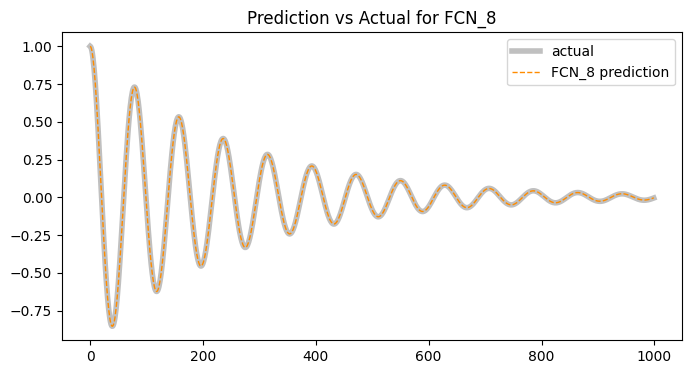

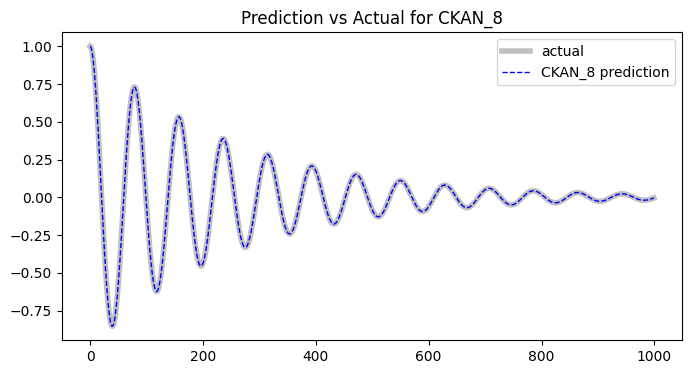

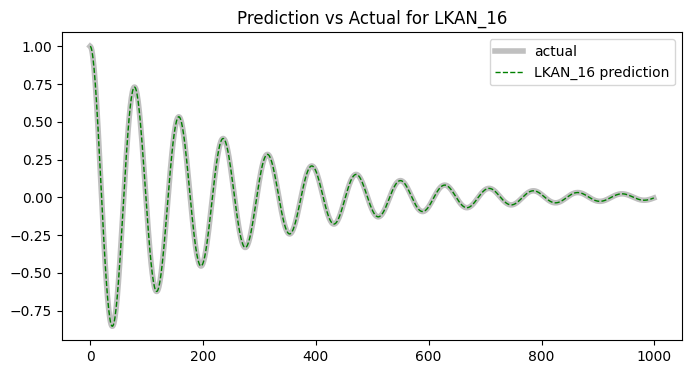

In [15]:
models = ['FCN_8', 'CKAN_8', 'LKAN_16']
colors = ['darkorange', 'blue', 'green']
analyser.plot_prediction_over_actual_1D(models, colors=colors, epoch=50000, figsize=(8, 4), exact_color='silver')

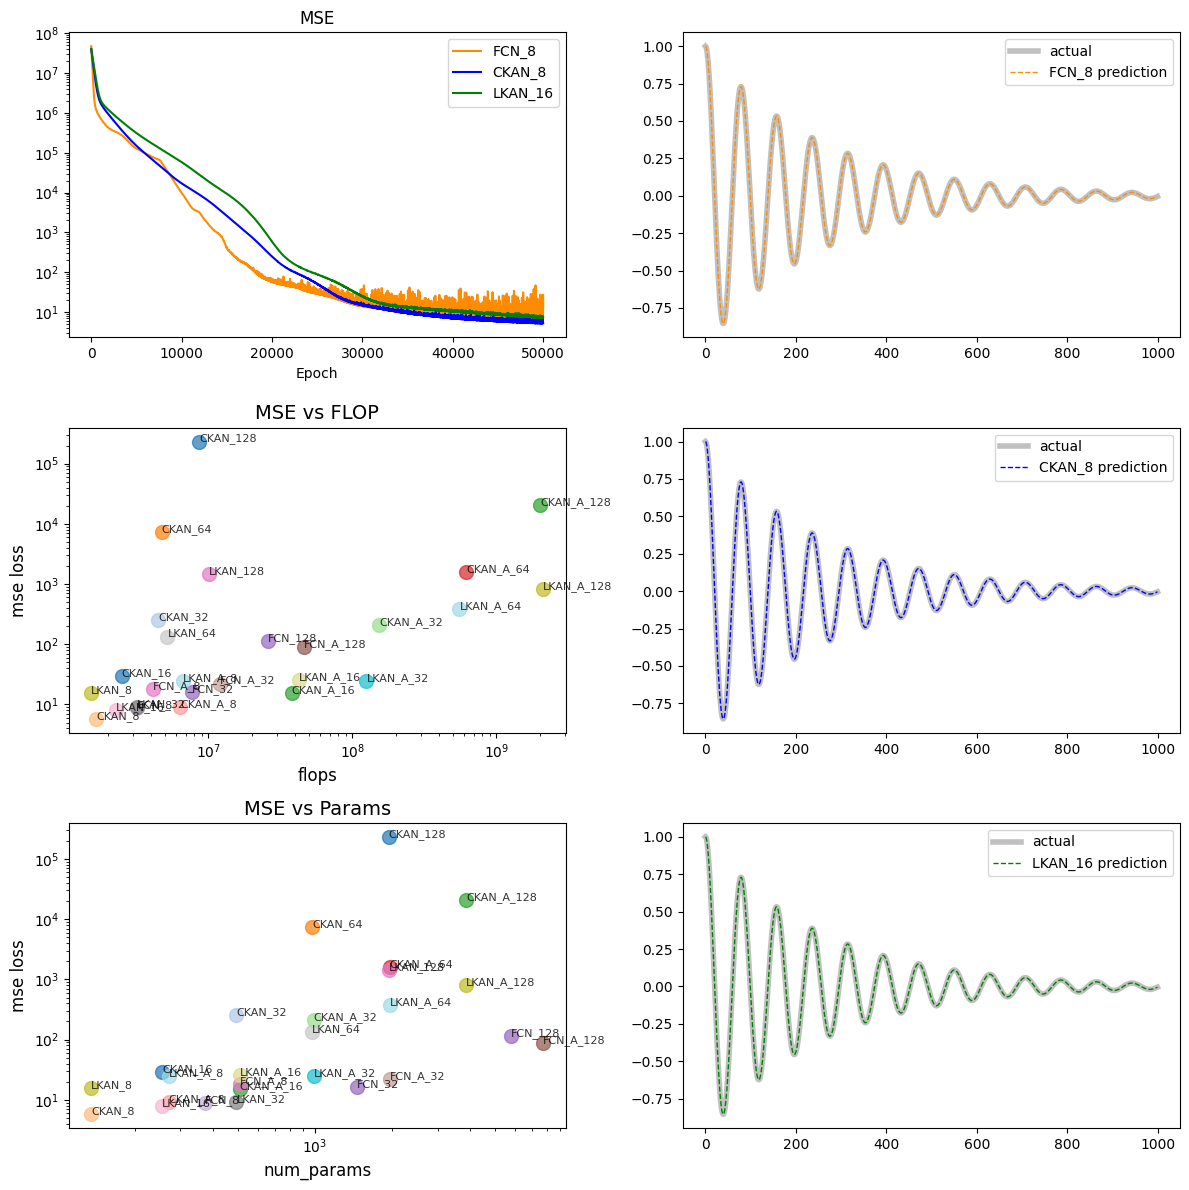

In [16]:
plt.figure(figsize=(12, 12))

plt.subplot(3,2,1)
plt.semilogy(analyser.mses['FCN_8'], label='FCN_8', color='darkorange')
plt.semilogy(analyser.mses['CKAN_8'], label='CKAN_8', color='blue')
plt.semilogy(analyser.mses['LKAN_16'], label='LKAN_16', color='green')
plt.title('MSE')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(3,2,3)
analyser.plot_mse_over_flops(noshow=True, legend=False)

plt.subplot(3,2,5)
analyser.plot_mse_over_params(noshow=True, legend=False)

pred_file = f'test_50000.npy'
exact_file = 'test_exact.npy'

plt.subplot(3,2,2)
pred = np.load(os.path.join(test_path, 'FCN_8', pred_file))
exact = np.load(os.path.join(test_path, 'FCN_8', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'FCN_8 prediction', linestyle='--', color='darkorange', linewidth=1)
plt.legend()

plt.subplot(3,2,4)
pred = np.load(os.path.join(test_path, 'CKAN_8', pred_file))
exact = np.load(os.path.join(test_path, 'CKAN_8', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'CKAN_8 prediction', linestyle='--', color='blue', linewidth=1)
plt.legend()

plt.subplot(3,2,6)
pred = np.load(os.path.join(test_path, 'LKAN_16', pred_file))
exact = np.load(os.path.join(test_path, 'LKAN_16', exact_file))
plt.plot(exact, label='actual', linestyle='-', lw=4, color='silver')
plt.plot(pred, label=f'LKAN_16 prediction', linestyle='--', color='green', linewidth=1)
plt.legend()

plt.tight_layout()
plt.show()